# Importing Modules

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import numpy as np
import pandas as pd 
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,r2_score
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/bank-marketing/bank-additional-full.csv', sep = ';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# Checking for categorical columns

In [4]:
for col in df.columns:
    print()
    if df[col].dtype == 'object':
        print(f'Name of Column is: {col} and unique values are: {df[col].unique()}')



Name of Column is: job and unique values are: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Name of Column is: marital and unique values are: ['married' 'single' 'divorced' 'unknown']

Name of Column is: education and unique values are: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

Name of Column is: default and unique values are: ['no' 'unknown' 'yes']

Name of Column is: housing and unique values are: ['no' 'yes' 'unknown']

Name of Column is: loan and unique values are: ['no' 'yes' 'unknown']

Name of Column is: contact and unique values are: ['telephone' 'cellular']

Name of Column is: month and unique values are: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Name of Column is: day_of_week and unique values are: ['mon' 'tue' 'wed' 'thu' 'fri']





Name of Column is: poutcome and unique valu

# Utility Functions

In [5]:
#this function returns categorical variables
def return_categorical(df):

  categorical_columns = [column_name for column_name in df if df[column_name].dtype == 'O']
  return categorical_columns

#this function returns numerical variables
def return_numerical(df):

  return list(set(df.columns) - set(return_categorical(df)))


def check_normal(df):
  fig, axes = plt.subplots(1,len(return_numerical(df)), figsize =(70, 10))

  for i,numeric_column_name in enumerate(list(set(df.columns) -set(return_categorical(df)))):

    sns.distplot(df[numeric_column_name], ax=axes[i]);
    plt.title(f'Distribution of {numeric_column_name}');


# Checking distribution for continuous variables

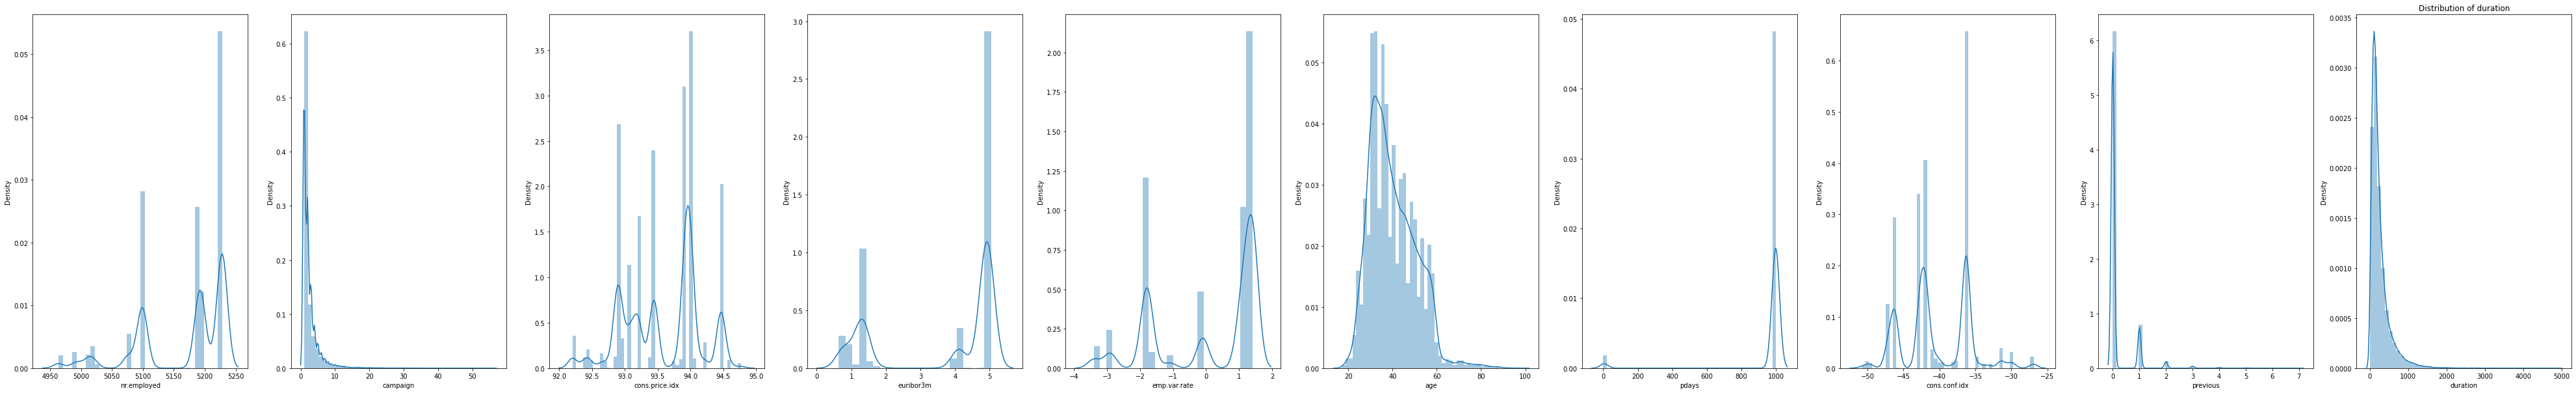

In [6]:
check_normal(df)

> None of the features are following a normal distribution

# Checking distribution for Continuous Variables

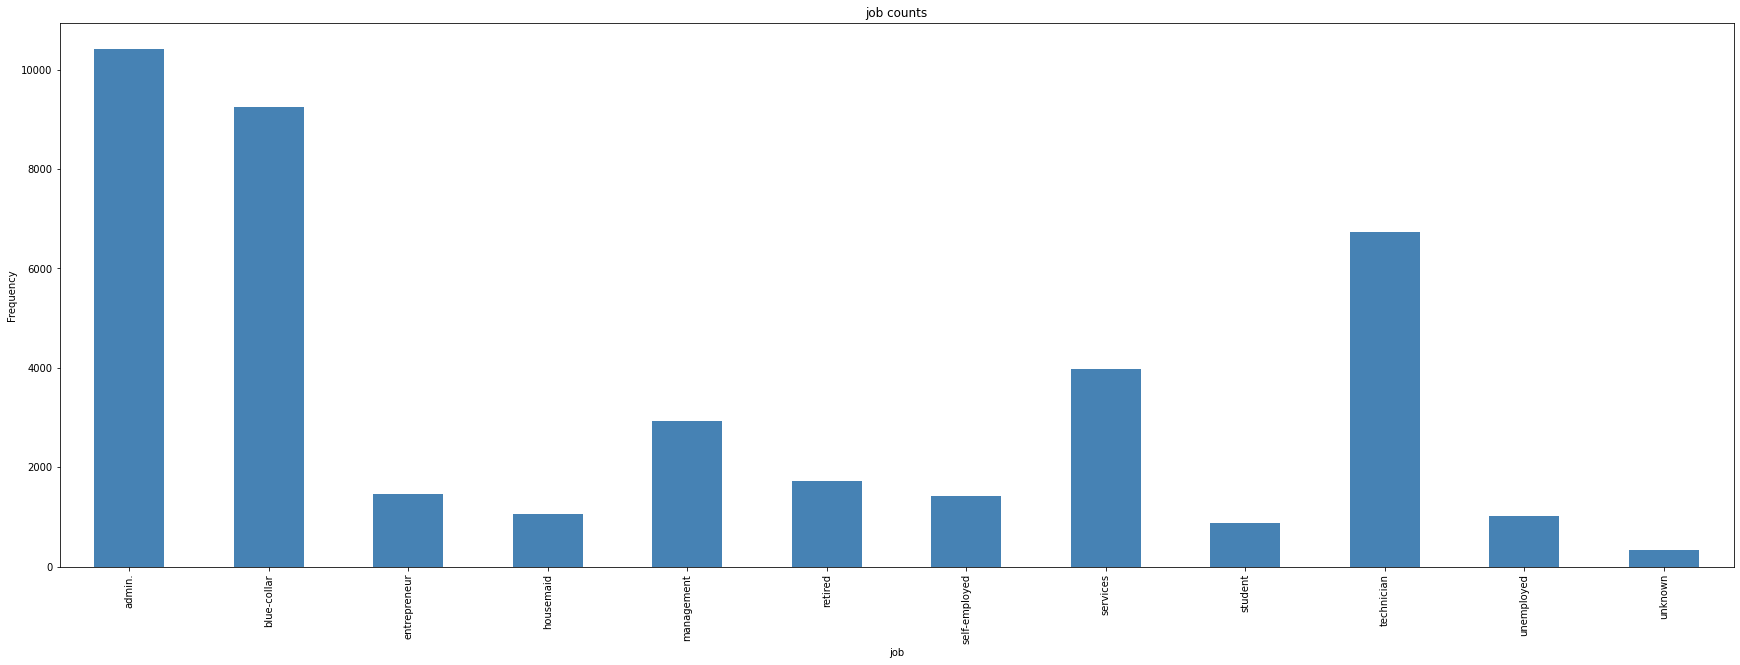

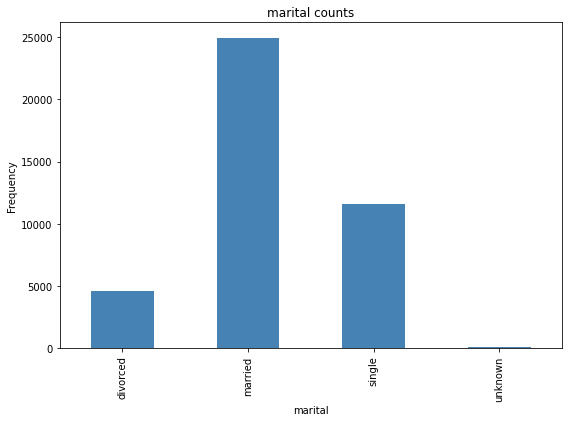

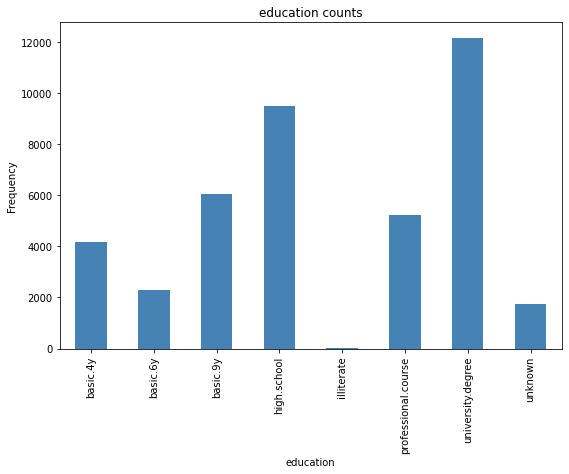

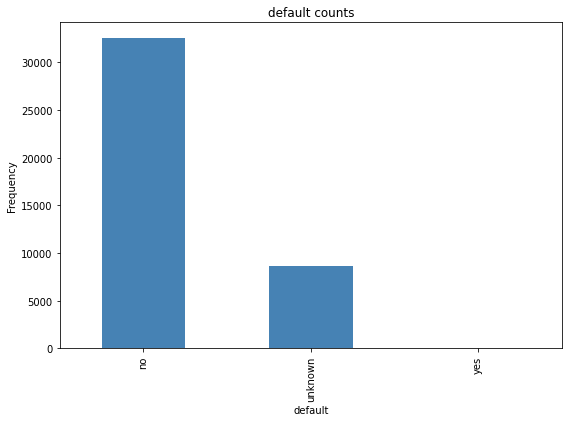

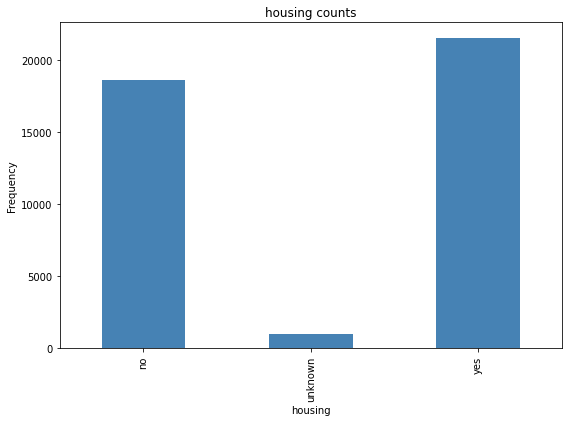

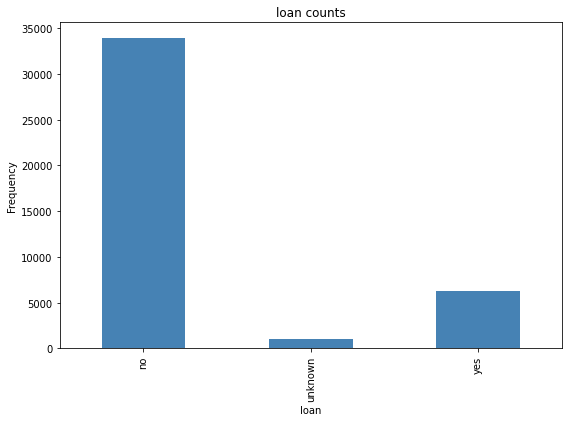

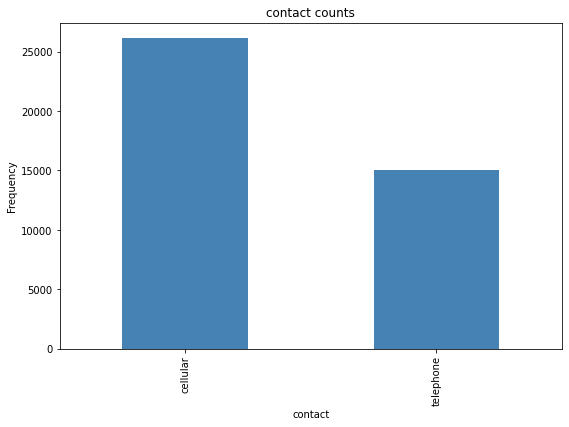

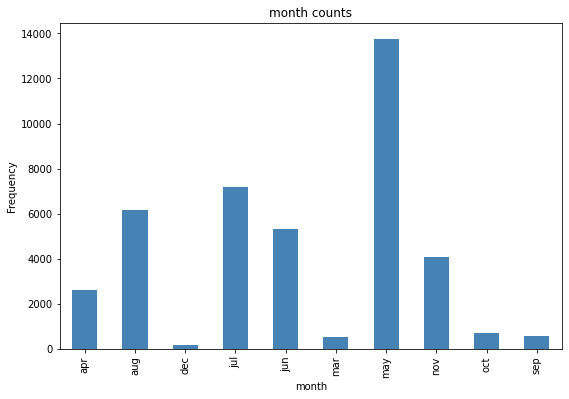

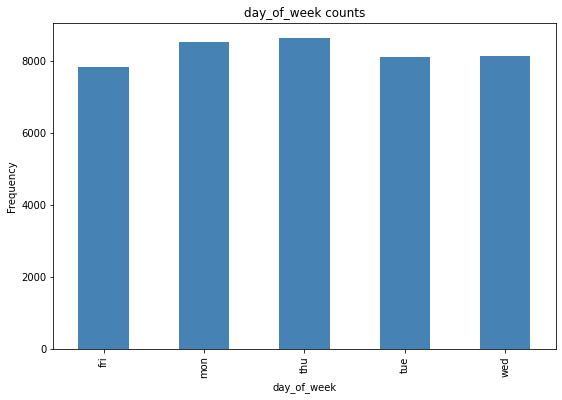

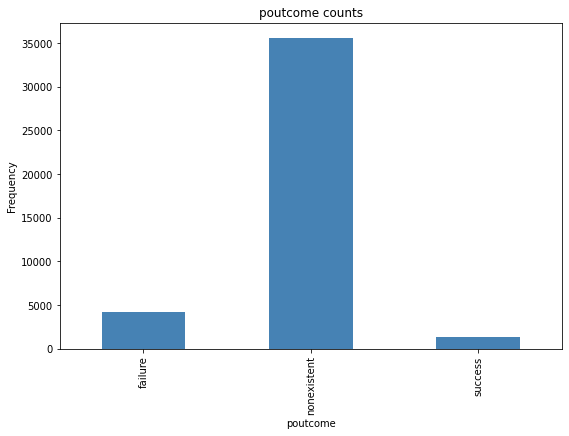

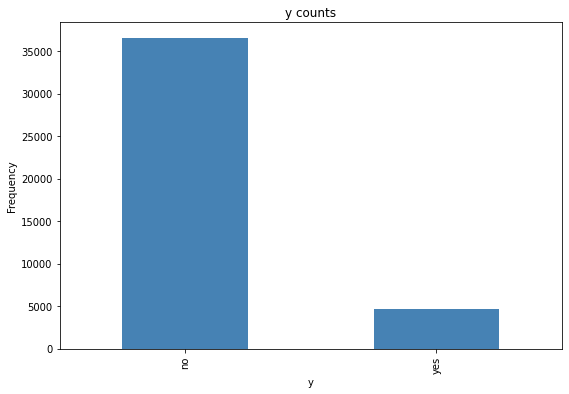

In [7]:
# plotting graphs for all categorical columns
for col in return_categorical(df):
    counts = df[col].value_counts().sort_index()
    if len(counts) > 10:
      fig = plt.figure(figsize=(30, 10))
    else:
      fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

# Checking for highly correlated columns

In [8]:
corr = df.corr()
corr_greater_than_75 = corr[corr>=.75]
corr_greater_than_75

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
campaign,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pdays,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
previous,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
emp.var.rate,NaN,NaN,NaN,NaN,NaN,1.000000,0.775334,NaN,0.972245,0.906970
cons.price.idx,NaN,NaN,NaN,NaN,NaN,0.775334,1.000000,NaN,NaN,NaN
cons.conf.idx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
euribor3m,NaN,NaN,NaN,NaN,NaN,0.972245,NaN,NaN,1.000000,0.945154
nr.employed,NaN,NaN,NaN,NaN,NaN,0.906970,NaN,NaN,0.945154,1.000000


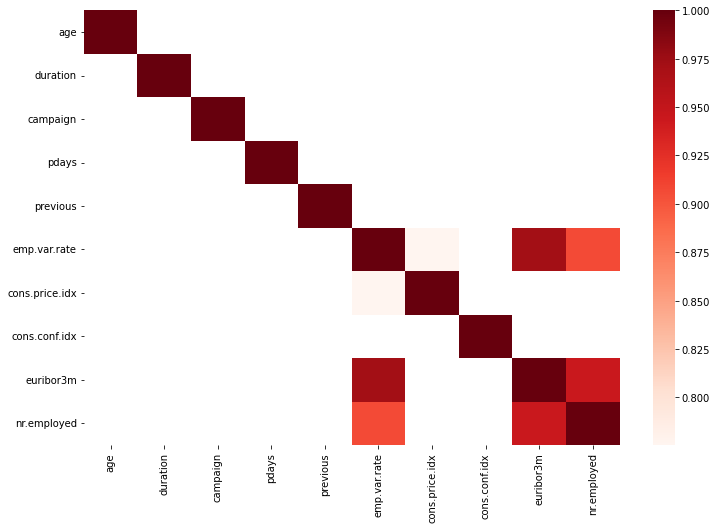

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_greater_than_75, cmap="Reds");

> Some correlation can e seen here between emp. var rate and nr.employed.

> Also, euribor3m and emp.var rate.

> However,  I would not be removing any. As I am gonna mostly be training on tree models which doesn't require much preprocessing.

# Checking unique values for days column

In [10]:
df['pdays'].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20])

>> 999 represents no contact has been done, thus i'll be assigning it a very less weight.

# Modifying the columns, I am gonna se weights here to depict the importance

In [11]:
df['job'] = df['job'].apply(lambda x: -1 if x=='unknown' or x=='unemployed' else (15 if x=='entrepreneur' else (8 if x == 'blue-collar' else ( 6 if x=='technician' or x=='services' or  x=='admin.' or x=='management' else (4 if x== 'self-employed' or x=='student' else (2 if x=='housemaid' or x=='retired' else None) )))))
df['housing'] = df['housing'].apply(lambda x: 0 if x=='no' else (1 if x=='yes' else -1))
df['loan'] = df['loan'].apply(lambda x: 0 if x=='no' else (1 if x=='yes' else -1))
df['y'] = df['y'].apply(lambda x: 0 if x=='no' else (1 if x=='yes' else -1))
df['default'] = df['default'].apply(lambda x: 0 if x=='no' else (1 if x=='yes' else -1))
df['poutcome'] = df['poutcome'].apply(lambda x: 0 if x=='failure' else (2 if x=='failure' else -1))
df['pdays'] = df['pdays'].apply(lambda x: 0 if x==999 else(20 if x<=10 else(6 if x<=20 else 3)))



# Dropping columns which I feel won't affect the prediction here

In [12]:
df.drop(['day_of_week', 'contact', 'month'], axis=1, inplace = True)

In [13]:
df  = pd.get_dummies(df, drop_first = True)
x = df.drop("y", axis=1)
y = df['y']
x.sample()
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=42)

In [18]:
def classifier(clf, x_train,x_test,y_train,y_test):
    y_test_pred = clf.predict(x_test)
    y_train_pred = clf.predict(x_train)

    accuracy_test = accuracy_score(y_test,y_test_pred)
    accuracy_train =  accuracy_score(y_train,y_train_pred)
    
    roc_test = roc_auc_score(y_test, y_test_pred, multi_class='ovr')
    roc_train = roc_auc_score(y_train, y_train_pred, multi_class='ovr')
    
    print('Train accuracy is:',accuracy_train )
    print('Test accuracy is:',accuracy_test )
    print()
    print('Train ROC is:', roc_train)
    print('Test ROC is:',roc_test )
    
    # Fscore, precision and recall on test data
    f1 = f1_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred) 
    print()
    print("F score is:",f1 )
    print("Precision is:",precision)
    print("Recall is:", recall)
  

def random_search(clf,params, x_train,x_test,y_train,y_test):
    
    random_search = RandomizedSearchCV(estimator= clf, param_distributions=params, scoring='roc_auc', cv=5)
    random_search.fit(x_train, y_train)
    optimal_model = random_search.best_estimator_

    print("Best parameters are: ", random_search.best_params_)
    print()
    print("Best estimator is: ", random_search.best_estimator_)
    print()
    print('Scores and accuracies are:')
    print()
    classifier(optimal_model, x_train,x_test,y_train,y_test)



# KNN

In [29]:

knn = KNeighborsClassifier(n_neighbors = 20)
s = StandardScaler()
knn.fit( s.fit_transform(x_train), y_train)

classifier(knn, s.fit_transform(x_train),s.transform(x_test),y_train,y_test)



Train accuracy is: 0.907060308827814
Test accuracy is: 0.9019131785957075

Train ROC is: 0.641889802593506
Test ROC is: 0.6256792163772243

F score is: 0.38112745098039214
Precision is: 0.6492693110647182
Recall is: 0.2697311361665221


# Optimizing KNN

In [30]:
s = StandardScaler()

error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit( s.fit_transform(x_train), y_train)
 pred_i = knn.predict(s.transform(x_test))
 error_rate.append(np.mean(pred_i != y_test))



Minimum error:- 0.09624162377391474 at K = 10


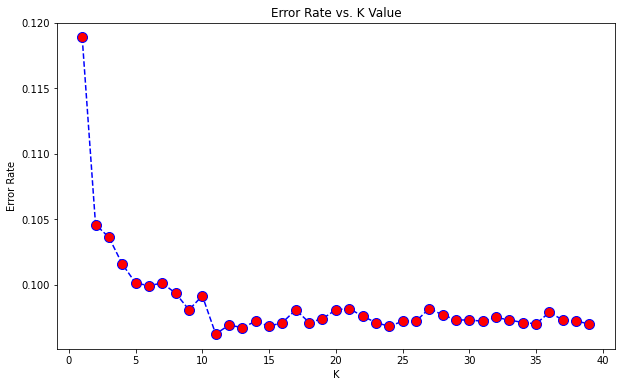

In [31]:

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))


Maximum accuracy:- 0.9037583762260852 at K = 10


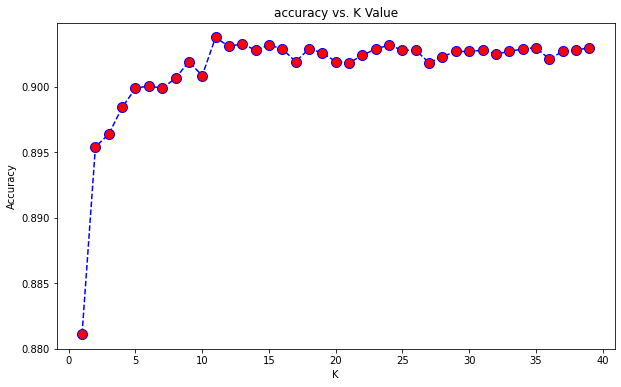

In [32]:
acc = []
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(s.fit_transform(x_train), y_train)
    yhat = neigh.predict(s.transform(x_test))
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

# With k which gave the least error

In [33]:

knn = KNeighborsClassifier(n_neighbors = 10)
s = StandardScaler()
knn.fit( s.fit_transform(x_train), y_train)

classifier(knn, s.fit_transform(x_train),s.transform(x_test),y_train,y_test)

Train accuracy is: 0.9124340422776861
Test accuracy is: 0.9008449062833835

Train ROC is: 0.6625638927782183
Test ROC is: 0.6277305238189546

F score is: 0.3838261919130959
Precision is: 0.6309523809523809
Recall is: 0.27580225498699046


# Bagging with KNN as base estimator

In [34]:

kfold = model_selection.KFold(n_splits = 3)
  
# bagging classifier
model = BaggingClassifier(base_estimator = KNeighborsClassifier(n_neighbors = 10),
                          n_estimators = 15)
classifier(model.fit( s.fit_transform(x_train), y_train), s.fit_transform(x_train),s.transform(x_test),y_train,y_test)

Train accuracy is: 0.915509371661649
Test accuracy is: 0.9032727979023016

Train ROC is: 0.6908277913790936
Test ROC is: 0.6537306346030249

F score is: 0.43473325766174803
Precision is: 0.6288998357963875
Recall is: 0.33217692974848223


# Decision Tree

In [19]:
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(x_train, y_train)
classifier(dtree, x_train,x_test,y_train,y_test)

Train accuracy is: 1.0
Test accuracy is: 0.8889967951830631

Train ROC is: 1.0
Test ROC is: 0.7286871556493425

F score is: 0.5129953131657435
Precision is: 0.5041876046901173
Recall is: 0.5221162185602776


# Optimizing decision tree

In [20]:
param_grid = {'max_depth':np.arange(3,20),
              'min_samples_split': np.arange(3,20,1),
             'min_samples_leaf':np.arange(3,30),
              'min_samples_split' : np.arange(3,30),
              'criterion': ('gini', 'entropy')}



random_search(DecisionTreeClassifier(random_state=0),param_grid, x_train,x_test,y_train,y_test)

Best parameters are:  {'min_samples_split': 5, 'min_samples_leaf': 25, 'max_depth': 8, 'criterion': 'gini'}

Best estimator is:  DecisionTreeClassifier(max_depth=8, min_samples_leaf=25, min_samples_split=5,
                       random_state=0)

Scores and accuracies are:

Train accuracy is: 0.922469327635881
Test accuracy is: 0.9124016703894338

Train ROC is: 0.780724656675668
Test ROC is: 0.7558871110321964

F score is: 0.5862385321100917
Precision is: 0.6222005842259006
Recall is: 0.5542064180398959


# Decision tree based Bagging

In [28]:
# I have chosen tuned hyperparameters here


kfold = model_selection.KFold(n_splits = 3)

# bagging classifier
model = BaggingClassifier(base_estimator = DecisionTreeClassifier(min_samples_split=5, min_samples_leaf=25, max_depth=8, criterion='gini'),n_estimators = 500,)

classifier(model.fit(x_train, y_train), x_train,x_test,y_train,y_test)

Train accuracy is: 0.9248972192547992
Test accuracy is: 0.9212391958822959

Train ROC is: 0.7792147529470871
Test ROC is: 0.7710952598834946

F score is: 0.6215585627624826
Precision is: 0.6727272727272727
Recall is: 0.577623590633131


# Random Forest

In [35]:
rforest = RandomForestClassifier(random_state=0)
classifier(rforest.fit(x_train, y_train), x_train,x_test,y_train,y_test)

Train accuracy is: 0.9999676281117478
Test accuracy is: 0.914441099349325

Train ROC is: 0.9998566102667049
Test ROC is: 0.7411186364605551

F score is: 0.5754216867469879
Precision is: 0.6475054229934925
Recall is: 0.5177797051170858


# Tuning random Forest

In [36]:
params = {'n_estimators' : np.arange(100,1000, 100),
              'max_depth' : np.arange(3,20,1),
              'min_samples_split' : np.arange(3,20,1),
              'min_samples_leaf' : np.arange(3,20,1),
         'max_features': ('sqrt', 'log2'), 'criterion': ('gini', 'entropy')}

random_search(RandomForestClassifier(random_state=0),params, x_train,x_test,y_train,y_test)

Best parameters are:  {'n_estimators': 500, 'min_samples_split': 17, 'min_samples_leaf': 11, 'max_features': 'sqrt', 'max_depth': 11, 'criterion': 'entropy'}

Best estimator is:  RandomForestClassifier(criterion='entropy', max_depth=11, max_features='sqrt',
                       min_samples_leaf=11, min_samples_split=17,
                       n_estimators=500, random_state=0)

Scores and accuracies are:

Train accuracy is: 0.9254475413550872
Test accuracy is: 0.9135670583665145

Train ROC is: 0.7169528157988821
Test ROC is: 0.6803701724513405

F score is: 0.49603624009060016
Precision is: 0.7145187601957586
Recall is: 0.3798785776235906


# Conclusion

> Bagging with Decision tree is performing the best according to recall and roc.

> For a credit insurance problem, I would want to go with recall here.